# Support Vector Machine (SVM) assignment.

* A support vector machine (SVM) is a type of supervised machine learning classification algorithm.
* It chooses the most optimal decision boundary which has maximum margin from the nearest points of all the classes.
* The nearest points from the most optimal decision boundary that maximize the distance between the decision boundary and other points are called support vectors.
* The SVM decision boundary is called the maximum margin classifier or the maximum margin hyper plane.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## SVM  regression

### Import data.

The market historical [data](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. This is a regression problem.

Attribute Information:

The inputs are as follows
* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

* The output,
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [2]:
data_reg = pd.read_csv('Real_Estate_valuation_data.csv')
data_reg=data_reg.sort_values('X4',ascending=True)

In [3]:
data_reg

,No.,X1,X2,X3,X4,X5,X6,Y
239,240,2013.500,18.1,837.72330,0,24.96334,121.54767,29.7
386,387,2012.833,0.0,185.42960,0,24.97110,121.53170,55.3
162,163,2012.750,16.0,4066.58700,0,24.94297,121.50342,11.6
164,165,2012.833,0.0,185.42960,0,24.97110,121.53170,55.2
331,332,2013.333,25.6,4519.69000,0,24.94826,121.49587,15.6
...,...,...,...,...,...,...,...,...
236,237,2013.167,3.6,373.83890,10,24.98322,121.53765,61.9
222,223,2013.583,30.6,431.11140,10,24.98123,121.53743,48.5
74,75,2012.917,6.8,379.55750,10,24.98343,121.53762,54.4
385,386,2013.000,18.3,82.88643,10,24.98300,121.54026,46.6


In [4]:
data_reg=data_reg.drop('No.',axis=1)

In [5]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 239 to 206
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [6]:
data_reg.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [7]:
data_reg.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


[]

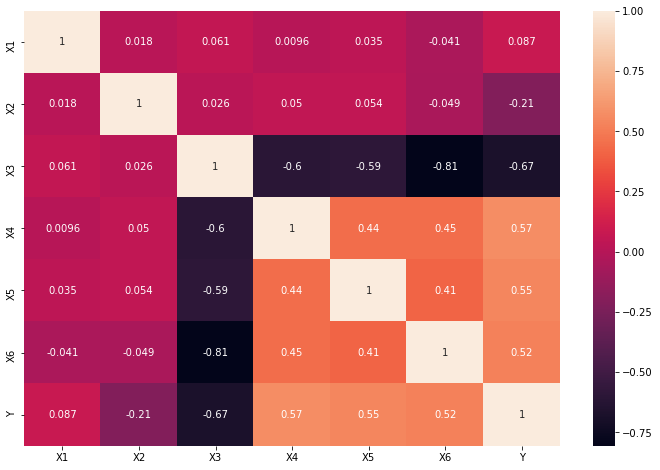

In [8]:
corr = data_reg.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.plot()

In [9]:
X = data_reg.iloc[:, 3].values
y = data_reg.iloc[:, 6].values

Text(0, 0.5, 'House Price')

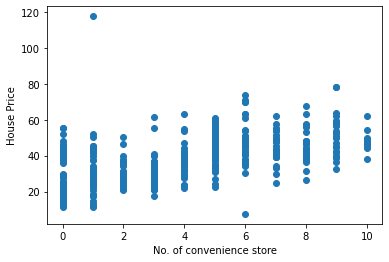

In [10]:
plt.scatter(X,y)
plt.xlabel('No. of convenience store')
plt.ylabel('House Price')

In [11]:
X.shape

(414,)

In [12]:
X=X.reshape(-1,1)
X.shape

(414, 1)

In [13]:
y.shape

(414,)

### Linear SVR

In [14]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')

In [15]:
from sklearn.model_selection import train_test_split
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X, y, test_size = 0.25)

In [16]:
svr_lin.fit(X_lin_train,y_lin_train)

SVR(kernel='linear')

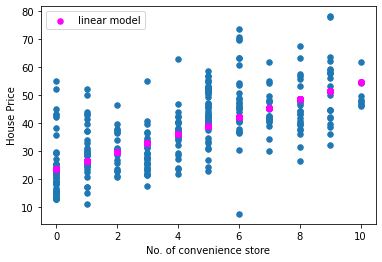

In [17]:
plt.scatter(X_lin_train, y_lin_train,s=30)
plt.scatter(X_lin_train, svr_lin.predict(X_lin_train), color='magenta',label='linear model',s=30)
plt.xlabel('No. of convenience store')
plt.ylabel('House Price')
plt.legend()

### Polynomial SVR

In [18]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X, y, test_size = 0.25)

In [19]:
svr_poly= SVR(kernel='poly')
svr_poly.fit(X_poly_train,y_poly_train)

SVR(kernel='poly')

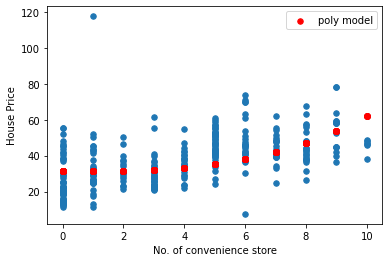

In [20]:
plt.scatter(X_poly_train, y_poly_train,s=30)
plt.scatter(X_poly_train, svr_poly.predict(X_poly_train), color='red',label='poly model',s=30)
plt.xlabel('No. of convenience store')
plt.ylabel('House Price')
plt.legend()

### Radial basic function(rbf) SVR

In [21]:
X_rbf_train, X_rbf_test, y_rbf_train, y_rbf_test = train_test_split(X, y, test_size = 0.25)

In [22]:
svr_rbf= SVR(kernel='rbf')
svr_rbf.fit(X_rbf_train,y_rbf_train)

SVR()

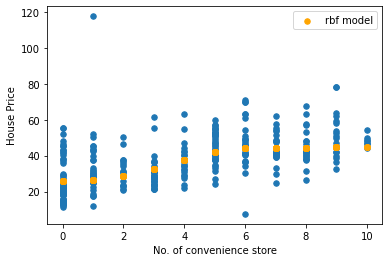

In [23]:
plt.scatter(X_rbf_train, y_rbf_train,s=30)
plt.scatter(X_rbf_train, svr_rbf.predict(X_rbf_train), color='orange',label='rbf model',s=30)
plt.xlabel('No. of convenience store')
plt.ylabel('House Price')
plt.legend()

### Comparison of the three models.

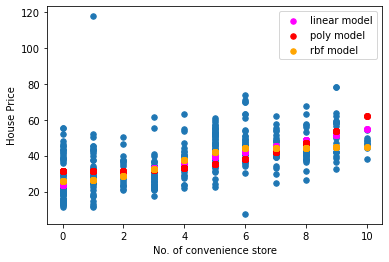

In [36]:
plt.scatter(X, y,s=30)
plt.scatter(X_lin_train, svr_lin.predict(X_lin_train), color='magenta',label='linear model',s=30)
plt.scatter(X_poly_train, svr_poly.predict(X_poly_train), color='red',label='poly model',s=30)
plt.scatter(X_rbf_train, svr_rbf.predict(X_rbf_train), color='orange',label='rbf model',s=30)
plt.xlabel('No. of convenience store')
plt.ylabel('House Price')
plt.legend()

## SVM Classification

### Importing the dataset
* The [data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contains the heart desease dataset of the Cleveland.

In [37]:
data_cls=pd.read_csv("processed_cleveland.data")

### Exploratory Data Analysis (EDA)

In [38]:
data_cls.shape

(303, 14)

In [39]:
data_cls.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [40]:
data_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    float64
 1   sex                     303 non-null    float64
 2   chest_pain_type         303 non-null    float64
 3   resting_blood_pressure  303 non-null    float64
 4   cholestoral             303 non-null    float64
 5   fasting_blood_sugar     303 non-null    float64
 6   resting_ecg             303 non-null    float64
 7   max_heart_rate          303 non-null    float64
 8   angina                  303 non-null    float64
 9   oldpeak                 303 non-null    float64
 10  slope                   303 non-null    float64
 11  ca                      303 non-null    object 
 12  thal                    303 non-null    object 
 13  diagnosis               303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory

In [41]:
data_cls.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
cholestoral               0
fasting_blood_sugar       0
resting_ecg               0
max_heart_rate            0
angina                    0
oldpeak                   0
slope                     0
ca                        0
thal                      0
diagnosis                 0
dtype: int64

In [42]:
data_cls.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [43]:
data_cls.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'angina', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis '],
      dtype='object')

### Correlation among all the features

[]

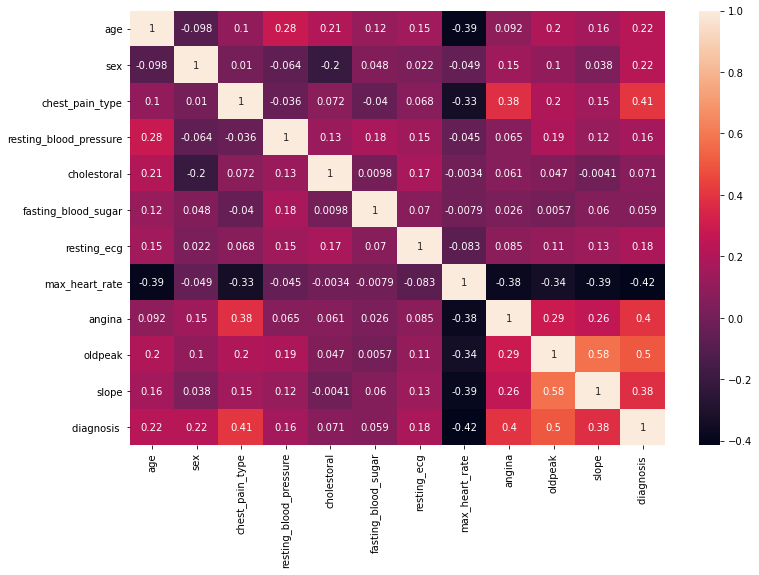

In [44]:
corr = data_cls.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.plot()

### Data PreProcessing

In [45]:
X= data_cls.iloc[:, [0,7]].values
y= data_cls.iloc[:, 13].values

In [46]:
X.shape

(303, 2)

In [47]:
y.shape

(303,)

### Classifying output on the basis of seriousness.

In [48]:
y= np.where(y<2,0,1)

### Visualization of data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


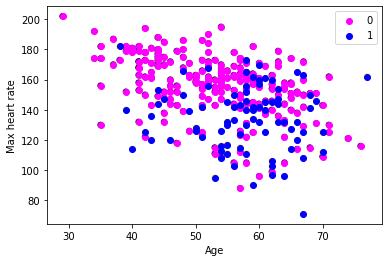

In [49]:
from matplotlib.colors import ListedColormap

plt.scatter(X[:,0], X[:,1], c=y, s=30)
plt.xlabel('Age')
plt.ylabel('Max heart rate');

for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.legend()

### Splitting training/test set data.

In [50]:
from sklearn.model_selection import train_test_split
X1_lin_train, X1_lin_test, y1_lin_train, y1_lin_test = train_test_split(X, y, test_size = 0.25)

### Training the algorithm

In [51]:
from sklearn.svm import SVC
svc_lin = SVC(kernel='linear')
svc_lin.fit(X1_lin_train, y1_lin_train)

SVC(kernel='linear')

### Data Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


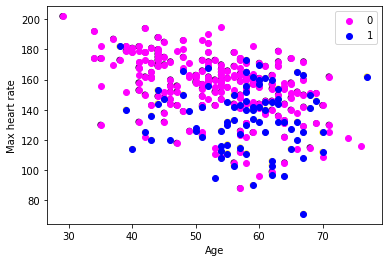

In [52]:
plt.scatter(X1_lin_train[:,0], X1_lin_train[:,1], c=y1_lin_train, s=30)
plt.xlabel('Age')
plt.ylabel('Max heart rate')

for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.legend()

### Plotting the support vectors.

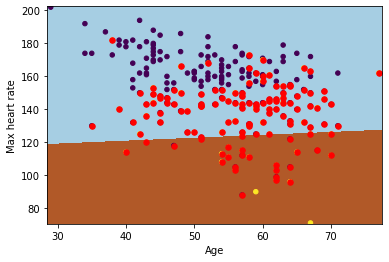

In [53]:
h = .02
x_min, x_max = X1_lin_train[:, 0].min() - .5, X1_lin_train[:, 0].max() + .5
y_min, y_max = X1_lin_train[:, 1].min() - .5, X1_lin_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc_lin.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_lin_train[:,0],X1_lin_train[:,1],c=y1_lin_train,s=20)

# for i, j in enumerate(np.unique(y1_lin_train)):
#     plt.scatter(X1_lin_train[y1_lin_train == j, 0], X1_lin_train[y1_lin_train == j, 1],
#                 c = ListedColormap(('magenta', 'blue'))(i), label = j)
# plt.legend()

plt.scatter(svc_lin.support_vectors_[:,0], svc_lin.support_vectors_[:,1], c='r',s=30)

plt.xlabel('Age')
plt.ylabel('Max heart rate');

### Making predictions

In [54]:
y1_lin_pred = svc_lin.predict(X1_lin_test)

### Evaluating the algorithm.

In [55]:
svc_lin.score(X1_lin_train,y1_lin_train)

0.7665198237885462

In [56]:
svc_lin.score(X1_lin_test,y1_lin_test)

0.6578947368421053

In [57]:
import sklearn.metrics as metrics
mea=metrics.mean_absolute_error(y1_lin_test, y1_lin_pred)
mse=metrics.mean_squared_error(y1_lin_test, y1_lin_pred)
rmse=np.sqrt(metrics.mean_squared_error(y1_lin_test, y1_lin_pred))
print(mea)
print(mse)
print(rmse)

0.34210526315789475
0.34210526315789475
0.5848976518656018


[[45 12]
 [14  5]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        57
           1       0.29      0.26      0.28        19

    accuracy                           0.66        76
   macro avg       0.53      0.53      0.53        76
weighted avg       0.65      0.66      0.65        76



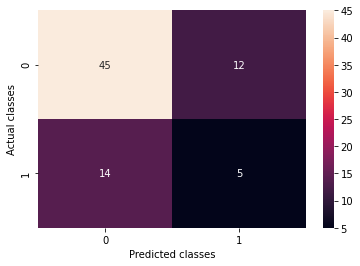

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y1_lin_test,y1_lin_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
print(classification_report(y1_lin_test,y1_lin_pred))

### SVC support vectors

In [59]:
svc_lin.support_vectors_

array([[ 62., 154.],
       [ 42., 150.],
       [ 54., 152.],
       [ 47., 143.],
       [ 70., 143.],
       [ 58., 131.],
       [ 61., 138.],
       [ 44., 149.],
       [ 68., 115.],
       [ 57., 141.],
       [ 56., 105.],
       [ 60., 144.],
       [ 62., 140.],
       [ 53., 143.],
       [ 67., 129.],
       [ 57., 112.],
       [ 45., 138.],
       [ 53., 152.],
       [ 64., 122.],
       [ 35., 130.],
       [ 48., 139.],
       [ 63., 150.],
       [ 64., 133.],
       [ 46., 147.],
       [ 63., 136.],
       [ 49., 126.],
       [ 59., 125.],
       [ 69., 131.],
       [ 65., 148.],
       [ 58., 144.],
       [ 64., 154.],
       [ 62., 146.],
       [ 43., 143.],
       [ 64., 105.],
       [ 67., 142.],
       [ 61., 146.],
       [ 46., 144.],
       [ 54., 147.],
       [ 57., 148.],
       [ 57.,  88.],
       [ 51., 142.],
       [ 71., 130.],
       [ 64., 155.],
       [ 67., 150.],
       [ 51., 143.],
       [ 64., 144.],
       [ 62.,  99.],
       [ 45.,

## Kernel SVM

### Polynomial kernel SVM

In [60]:
svc_poly = SVC(kernel='poly')

In [61]:
X1_poly_train, X1_poly_test, y1_poly_train, y1_poly_test = train_test_split(X, y, test_size = 0.25)

In [62]:
svc_poly.fit(X1_poly_train, y1_poly_train)

SVC(kernel='poly')

### Data Visualization.

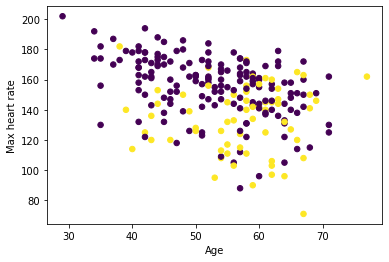

In [63]:
plt.scatter(X1_poly_train[:,0], X1_poly_train[:,1], c=y1_poly_train, s=30)
plt.xlabel('Age')
plt.ylabel('Max heart rate');

### Plotting support vectors.

Text(0, 0.5, 'Max heart rate')

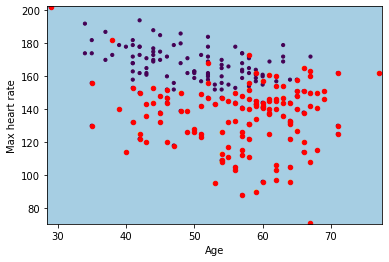

In [64]:
h = .02
x_min, x_max = X1_poly_train[:, 0].min() - .5, X1_poly_train[:, 0].max() + .5
y_min, y_max = X1_poly_train[:, 1].min() - .5, X1_poly_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_poly_train[:,0],X1_poly_train[:,1],c=y1_poly_train,s=10)
plt.scatter(svc_poly.support_vectors_[:,0], svc_poly.support_vectors_[:,1], c='r',s=20)

plt.xlabel('Age')
plt.ylabel('Max heart rate')

In [65]:
y1_poly_pred = svc_poly.predict(X1_poly_test)

In [66]:
svc_poly.score(X1_poly_train,y1_poly_train)

0.7180616740088106

In [67]:
svc_poly.score(X1_poly_test,y1_poly_test)

0.7368421052631579

In [68]:
import sklearn.metrics as metrics
mea=metrics.mean_absolute_error(y1_poly_test, y1_poly_pred)
mse=metrics.mean_squared_error(y1_poly_test, y1_poly_pred)
rmse=np.sqrt(metrics.mean_squared_error(y1_poly_test, y1_poly_pred))
print(mea)
print(mse)
print(rmse)

0.2631578947368421
0.2631578947368421
0.512989176042577


### RBF kernel SVM.

In [69]:
X1_rbf_train, X1_rbf_test, y1_rbf_train, y1_rbf_test = train_test_split(X, y, test_size = 0.25)

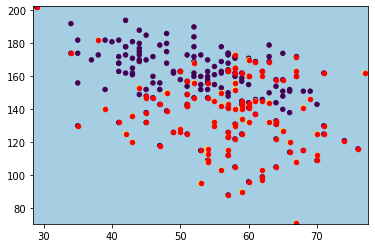

In [70]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X1_rbf_train,y1_rbf_train)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_rbf_train[:,0],X1_rbf_train[:,1],c=y1_rbf_train,s=20)
plt.scatter(svc_rbf.support_vectors_[:,0], svc_rbf.support_vectors_[:,1], c='r',s=20)

In [71]:
y1_rbf_pred = svc_rbf.predict(X1_rbf_test)

In [72]:
svc_rbf.score(X1_rbf_train,y1_rbf_train)

0.7444933920704846

In [73]:
svc_rbf.score(X1_rbf_test,y1_rbf_test)

0.6578947368421053

In [74]:
import sklearn.metrics as metrics
mea=metrics.mean_absolute_error(y1_rbf_test, y1_rbf_pred)
mse=metrics.mean_squared_error(y1_rbf_test, y1_rbf_pred)
rmse=np.sqrt(metrics.mean_squared_error(y1_rbf_test, y1_rbf_pred))
print(mea)
print(mse)
print(rmse)

0.34210526315789475
0.34210526315789475
0.5848976518656018


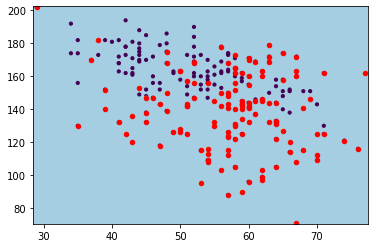

In [75]:
svc_rbf = SVC(kernel='rbf', C=0.1)
svc_rbf.fit(X1_rbf_train,y1_rbf_train)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_rbf_train[:,0],X1_rbf_train[:,1],c=y1_rbf_train,s=10)
plt.scatter(svc_rbf.support_vectors_[:,0], svc_rbf.support_vectors_[:,1], c='r',s=20)

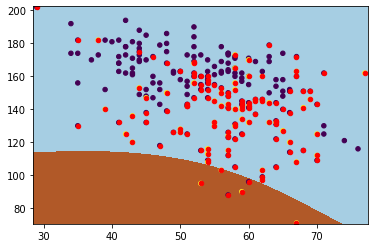

In [76]:
svc_rbf = SVC(kernel='rbf', C=1000)
svc_rbf.fit(X1_rbf_train,y1_rbf_train)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_rbf_train[:,0],X1_rbf_train[:,1],c=y1_rbf_train,s=20)
plt.scatter(svc_rbf.support_vectors_[:,0], svc_rbf.support_vectors_[:,1], c='r',s=20)

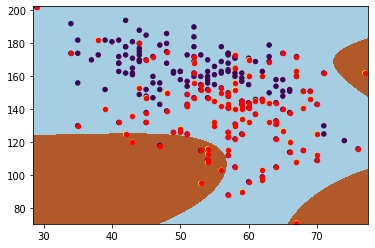

In [77]:
svc_rbf = SVC(kernel='rbf', C=100000)
svc_rbf.fit(X1_rbf_train,y1_rbf_train)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_rbf_train[:,0],X1_rbf_train[:,1],c=y1_rbf_train,s=20)
plt.scatter(svc_rbf.support_vectors_[:,0], svc_rbf.support_vectors_[:,1], c='r',s=20)

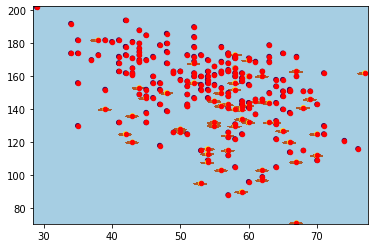

In [78]:
svc_rbf = SVC(kernel='rbf', C=100000, gamma=1)
svc_rbf.fit(X1_rbf_train,y1_rbf_train)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1_rbf_train[:,0],X1_rbf_train[:,1],c=y1_rbf_train,s=20)
plt.scatter(svc_rbf.support_vectors_[:,0], svc_rbf.support_vectors_[:,1], c='r',s=20)

## Simple grid search.

In [79]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.25)

In [80]:
best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X2_train, y2_train)
        score=svm.score(X2_test,y2_test)
        if score> best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
            
print('Best score: {:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))

Best score: 0.72
Best parameters:{'C': 0.001, 'gamma': 0.001}


## Using the validation set.

In [89]:
X_trainval,X_test,y_trainval,y_test=train_test_split(X,y,random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=1)

best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train, y_train)
        score=svm.score(X_valid,y_valid)
        if score> best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
            
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)

print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters:', best_parameters)
print('Test set score with best parameters: {:.2f}'.format(test_score))           

Best score on validation set: 0.70
Best parameters: {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.72


## Grid search with cross validation.

In [87]:
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm=SVC(gamma=gamma,C=C)
        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        
        if score> best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
            
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters:', best_parameters)
print('Test set score with best parameters: {:.2f}'.format(test_score))            

Best score on validation set: 0.72
Best parameters: {'C': 0.001, 'gamma': 0.001}
Test set score with best parameters: 0.72
